# SciPy Minimize

## Multidimensional Methods

* [Gradients and Hessians](#gradients_hessians)
* [Routine Comparison](#routine_comparison)
* [Bounds and Constraints](#bounds_constraints)

In [1]:
# Importing the packages for the example
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

### Function Form

The routine `minimize` optimizes over an array variable.  Each component of the array represents a dimension.  Any additional function variables are parameters that can be passed via the flag `args=` to the routine.

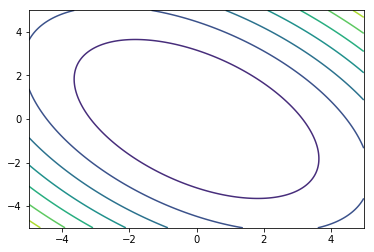

In [26]:
f = lambda x : x[0]**2 + x[1]**2 + x[0]*x[1]

x0 = np.arange(-5,5,.01)
x1 = np.arange(-5,5,.01)
x0_a, x1_a = np.meshgrid(x0,x1)

fig, ax = plt.subplots()
CS = ax.contour(x_a,y_a,f([x_a,y_a]))

In [27]:
optimize.minimize(f,[1,1])

      fun: 1.5869182200826406e-16
 hess_inv: array([[ 0.66666667, -0.33333333],
       [-0.33333333,  0.66666667]])
      jac: array([-6.91799246e-09, -6.91799246e-09])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-7.27305122e-09, -7.27305122e-09])

<div id="gradients_hessians" />

### Gradients and Hessians

Note: function returns need to be NumPy arrays

Rountines in the Newton-type category use the first derivative gradient (Jacobian) and potentially second derivative Hessian.  

In [42]:
def df (x):
    df_dx0 = 2*x[0] + x[1]
    df_dx1 = 2*x[1] + x[0]
    return np.array([df_dx0, df_dx1])

def d2f (x): 
    d2f_dx02 = 2
    d2f_dx12 = 2
    d2f_dx1dx0 = 1
    return np.array([[d2f_dx02, d2f_dx1dx0],
                    [ d2f_dx1dx0 , d2f_dx12]])

And how to pass that to minimize:

In [44]:
optimize.minimize(f,[1,1],jac=df)

      fun: 3.697785493223493e-32
 hess_inv: array([[ 0.66666667, -0.33333333],
       [-0.33333333,  0.66666667]])
      jac: array([3.33066907e-16, 3.33066907e-16])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.11022302e-16, 1.11022302e-16])

And to add the Hessian, I change the method to `Newton-CG`, as that method actually uses the Hessian:

In [46]:
optimize.minimize(f,[1,1],jac=df,hess=d2f,method='Newton-CG')

     fun: 0.0
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 3
    nhev: 2
     nit: 2
    njev: 4
  status: 0
 success: True
       x: array([0., 0.])

Let's just double check our manual derivatives.  Maybe something went wrong.  Luckily, `optimize` provides a rountine for this:

In [103]:
optimize.check_grad(f,df,[1,1])

0.0

By returning `0.0`, the rountine confirms that our manual gradient is identical to a finite derivative method at `[1,1]`.

If we don't provide derivative functions, `minimize` will use a finite derivative approximation. We can take a look at this finite derivative method itself:

In [102]:
optimize.approx_fprime([1,1],f, np.array([1e-6,1e-6]) )

array([3.000001, 3.000001])

<div id="routine_comparison" />

### Routine Comparison

| Routine | Gradient | Hessian | Line Search | Constraints |
| --- | --- | --- | --- | --- | 
| Nelder- Mead | no | no | no | no | 
| Powell | no | no | yes | no | 
| Conjugate Gradient |  yes | no | no | no | 
| BFGS | yes | approximated | no | no | 
| L-BFGS | 

L-BFGS suitable for large numbers of variables
Quasi-Newton methods: Hessian approximated by recent evaluations

Constraints: 
* Constrained optimization by linear approximation COBYLA
* Sequential Quadratic Programming SLSQP
* trust-constr 1

<div id="bounds_constraints" />

### Bounds and Constraints for `trust-constr`

Bound

$$
1 < x_0, x_1 <2
$$

Linear Constraint

$$
x_0 < 2 x_1 - 1
$$
$$
1 < - 1  x_0 + 2 x_1 < \infty
$$

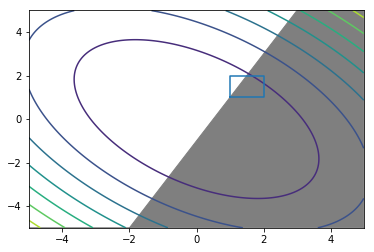

In [62]:
fig, ax = plt.subplots()
plt.ylim(-5,5)
ax.contour(x_a,y_a,f([x_a,y_a]))
ax.plot([1,1,2,2,1],[1,2,2,1,1])
ax.fill_between(x,2*x-1,-5,color='tab:grey')

In [29]:
bounds=optimize.Bounds([1,1],[2,2])
optimize.minimize(f,[1.5,1.5],bounds=bounds)

      fun: 3.0
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.99999998, 2.99999998])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 1
   status: 0
  success: True
        x: array([1., 1.])

In [94]:
linear_constraint = optimize.LinearConstraint([-1,2],1,np.inf)

In [95]:
optimize.minimize(f,[2,0],method='trust-constr',jac=df,hess=d2f,
                  constraints=[linear_constraint])

 barrier_parameter: 0.00016000000000000007
 barrier_tolerance: 0.00016000000000000007
          cg_niter: 9
      cg_stop_cond: 1
            constr: [array([1.00075882])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.023283958435058594
               fun: 0.10730552310463037
              grad: array([-0.21444832,  0.42889664])
               jac: [array([[-1,  2]])]
   lagrangian_grad: array([-4.13959866e-10,  8.27919566e-10])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 7
              nhev: 7
             niter: 11
              njev: 7
        optimality: 8.279195662375116e-10
            status: 1
         tr_radius: 6974.7904216717125
                 v: [array([-0.21444832])]
                 x: array([-0.28593109,  0.35741386])